# World Homicide Data Analysis

Data analysis project using world-homicide dataset

Objective: Explore and create the visualization using Python

Skill: Python for Data Analysis

# Step one:
Importing the necessary libraries/tools. In this case, we'll import Numpy, Pandas, Matplotlib, Plotly, and Seaborn.

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import plotly as px
import seaborn as sns

# Step two:
Upload the dataset
Here's how to upload the dataset:
1. Download the dataset with csv format
2. On Kaggle Notebook, find menu 'Input' and chose 'Upload'
3. On the 'Datasets' dropdown menu you'll find your data set and select the arrow on the right side right next to your dataset name.
4. Hover your cursor to the right to copy your dataset path and run the script.

In [2]:
df = pd.read_csv('/kaggle/input/world-homicide/homicide_by_countries.csv')

# Step three:
Data Exploration

In [3]:
df.head
# df.head function is to see the top 5 row of our data

<bound method NDFrame.head of         Location    Region           Subregion  Rate  Count  Year
0    Afghanistan      Asia       Southern Asia   6.7   2474  2018
1        Albania    Europe     Southern Europe   2.1     61  2020
2        Algeria    Africa     Northern Africa   1.3    580  2020
3        Andorra    Europe     Southern Europe   2.6      2  2020
4         Angola    Africa       Middle Africa   4.8   1217  2012
..           ...       ...                 ...   ...    ...   ...
190    Venezuela  Americas       South America  36.7  10598  2018
191      Vietnam      Asia  South-Eastern Asia   1.5   1358  2011
192        Yemen      Asia        Western Asia   6.8   1703  2013
193       Zambia    Africa      Eastern Africa   5.4    853  2015
194     Zimbabwe    Africa      Eastern Africa   7.5    981  2012

[195 rows x 6 columns]>

In [4]:
df.shape
# df.shape is to see how much rows and columns that we have in our dataset

(195, 6)

In [5]:
df.isnull().sum()
# df.isnull().sum() is to see if our dataset has null values in it. 
# Should you have null value, you can drop/delete them by typing df.dropna(inplace = True)
# Or you could use this df.dropna = (subset = ['Subregion'], inplace = True)

Location     0
Region       0
Subregion    0
Rate         0
Count        0
Year         0
dtype: int64

In [6]:
df.dtypes
# df.dtypes is to see the type of data of our columns

Location      object
Region        object
Subregion     object
Rate         float64
Count          int64
Year           int64
dtype: object

In [7]:
# df['Rate'] = df['Rate'].astype(int) is to convert a column data type to

# You could also do this to make it look more professional:
#my_list = ['Rate', 'Count', 'Year']
#for i in my_list:
    #print(i)
    #df[i] = df[i].astype(int)

In [8]:
df

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6.7,2474,2018
1,Albania,Europe,Southern Europe,2.1,61,2020
2,Algeria,Africa,Northern Africa,1.3,580,2020
3,Andorra,Europe,Southern Europe,2.6,2,2020
4,Angola,Africa,Middle Africa,4.8,1217,2012
...,...,...,...,...,...,...
190,Venezuela,Americas,South America,36.7,10598,2018
191,Vietnam,Asia,South-Eastern Asia,1.5,1358,2011
192,Yemen,Asia,Western Asia,6.8,1703,2013
193,Zambia,Africa,Eastern Africa,5.4,853,2015


In [9]:
df['Region'].replace('Americas', 'N/S America')

0             Asia
1           Europe
2           Africa
3           Europe
4           Africa
          ...     
190    N/S America
191           Asia
192           Asia
193         Africa
194         Africa
Name: Region, Length: 195, dtype: object

# Step four:
Pull the data from column Location and Count, calculate the data using percentage for the result and Create a function for visualization using pie chart

In [10]:
df1 = df.sort_values('Count', ascending = False).reset_index(drop = True)
df1

,Location,Region,Subregion,Rate,Count,Year
0,Brazil,Americas,South America,22.5,47722,2020
1,Nigeria,Africa,Western Africa,22.0,44200,2019
2,India,Asia,Southern Asia,3.0,40651,2020
3,Mexico,Americas,Central America,28.4,36579,2020
4,United States,Americas,Northern America,6.5,21570,2020
...,...,...,...,...,...,...
190,Holy See,Europe,Southern Europe,0.0,0,2015
191,Channel Islands,Europe,Northern Europe,0.0,0,2010
192,Saint Helena,Africa,Western Africa,0.0,0,2009
193,San Marino,Europe,Southern Europe,0.0,0,2011


In [11]:
df1.Location

0               Brazil
1              Nigeria
2                India
3               Mexico
4        United States
            ...       
190           Holy See
191    Channel Islands
192       Saint Helena
193         San Marino
194            Bermuda
Name: Location, Length: 195, dtype: object

In [12]:
df1 = df[['Location', 'Count']].sort_values(by = 'Count', ascending = False).head(5)
df1['Percentage'] = (df['Count'] *100 / df1['Count'].sum()).round(2)
df1

,Location,Count,Percentage
26,Brazil,47722,25.02
125,Nigeria,44200,23.18
78,India,40651,21.31
111,Mexico,36579,19.18
186,United States,21570,11.31


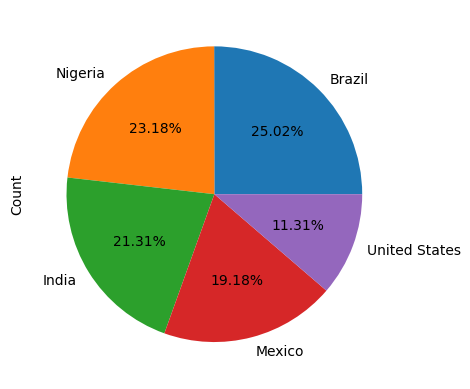

In [13]:
df1.plot(x = 'Location', y = 'Count', kind = 'pie', labels = df1.Location, autopct = '%1.2f%%')
plt.legend().set_visible(False)

# Step five:

Pull the data from column Region and Count, and create a function for visualization using bar chart

In [14]:
df2 = df.groupby('Region')['Count'].sum().sort_values(ascending = False)
df2

Region
Americas    153597
Asia        105552
Africa       99481
Europe       19869
Oceania        347
Name: Count, dtype: int64

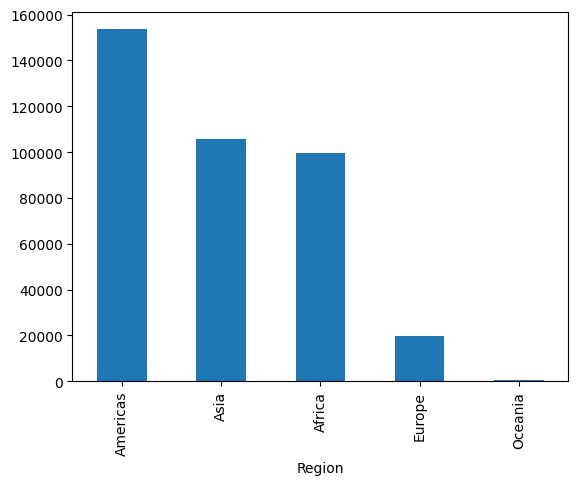

In [15]:
df2.plot(kind = 'bar')
plt.show()

# Here, we can see that North and South America has the highest number of homicide case compared to the other

In [16]:
df

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6.7,2474,2018
1,Albania,Europe,Southern Europe,2.1,61,2020
2,Algeria,Africa,Northern Africa,1.3,580,2020
3,Andorra,Europe,Southern Europe,2.6,2,2020
4,Angola,Africa,Middle Africa,4.8,1217,2012
...,...,...,...,...,...,...
190,Venezuela,Americas,South America,36.7,10598,2018
191,Vietnam,Asia,South-Eastern Asia,1.5,1358,2011
192,Yemen,Asia,Western Asia,6.8,1703,2013
193,Zambia,Africa,Eastern Africa,5.4,853,2015


# Step six:

Pull the data from column Subregion and Count, and create a function for visualization using Seaborn bar charta

In [17]:
df3 = df.groupby('Subregion')['Count'].sum().sort_values(ascending = False)
df3

Subregion
South America             78872
Southern Asia             58631
Central America           47371
Western Africa            46318
South-Eastern Asia        25314
Eastern Africa            23669
Northern America          22317
Southern Africa           21479
Eastern Europe            14604
Western Asia              11638
Eastern Asia               8563
Northern Africa            5538
Caribbean                  5037
Middle Africa              2477
Northern Europe            2097
Western Europe             2075
Central Asia               1406
Southern Europe            1093
Australia, New Zealand      347
Name: Count, dtype: int64

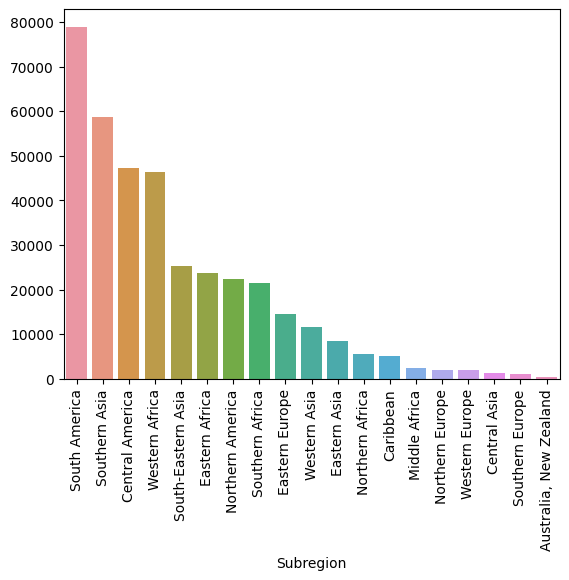

In [18]:
sns.barplot(x= df3.index, y = df3.values)
plt.xticks(rotation = 'vertical')
xlabel =  None

# Step seven:

Pull the data from column Region (Asia & Europe), Year and Count, and create a function for visualization using Matplotlib line chart

In [19]:
df

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6.7,2474,2018
1,Albania,Europe,Southern Europe,2.1,61,2020
2,Algeria,Africa,Northern Africa,1.3,580,2020
3,Andorra,Europe,Southern Europe,2.6,2,2020
4,Angola,Africa,Middle Africa,4.8,1217,2012
...,...,...,...,...,...,...
190,Venezuela,Americas,South America,36.7,10598,2018
191,Vietnam,Asia,South-Eastern Asia,1.5,1358,2011
192,Yemen,Asia,Western Asia,6.8,1703,2013
193,Zambia,Africa,Eastern Africa,5.4,853,2015


In [20]:
df.Year.value_counts()

Year
2020    94
2019    20
2018    13
2012    11
2017    10
2016     9
2015     9
2009     6
2014     5
2013     5
2011     5
2010     3
2006     2
2007     1
2021     1
2008     1
Name: count, dtype: int64

In [21]:
df[df['Region'].isin(['Asia', 'Europe'])]

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6.7,2474,2018
1,Albania,Europe,Southern Europe,2.1,61,2020
3,Andorra,Europe,Southern Europe,2.6,2,2020
8,Armenia,Asia,Western Asia,1.8,52,2020
11,Austria,Europe,Western Europe,0.7,65,2020
...,...,...,...,...,...,...
183,United Arab Emirates,Asia,Western Asia,0.7,64,2019
184,United Kingdom,Europe,Northern Europe,1.1,755,2018
189,Uzbekistan,Asia,Central Asia,1.2,396,2019
191,Vietnam,Asia,South-Eastern Asia,1.5,1358,2011


In [22]:
df4 = df[(df['Region'] == 'Asia') | (df['Region'] == 'Europe')]

In [23]:
df4 = df4[df4['Year']> 2016][['Region', 'Year', 'Count']]

In [24]:
df4 = df4.groupby(['Region', 'Year']).sum()['Count']
df4

Region  Year
Asia    2017     1787
        2018    16923
        2019     6458
        2020    53516
        2021    15299
Europe  2017     3670
        2018      883
        2019      249
        2020    15066
Name: Count, dtype: int64

In [25]:
# Let's unstack it
df_unstacked = df4.unstack(level = 0)
df_unstacked

Region,Asia,Europe
Year,,
2017,1787.0,3670.0
2018,16923.0,883.0
2019,6458.0,249.0
2020,53516.0,15066.0
2021,15299.0,NaN


In [26]:
df_unstacked.index = df_unstacked.index.astype(int).astype(str)

<function matplotlib.pyplot.show(close=None, block=None)>

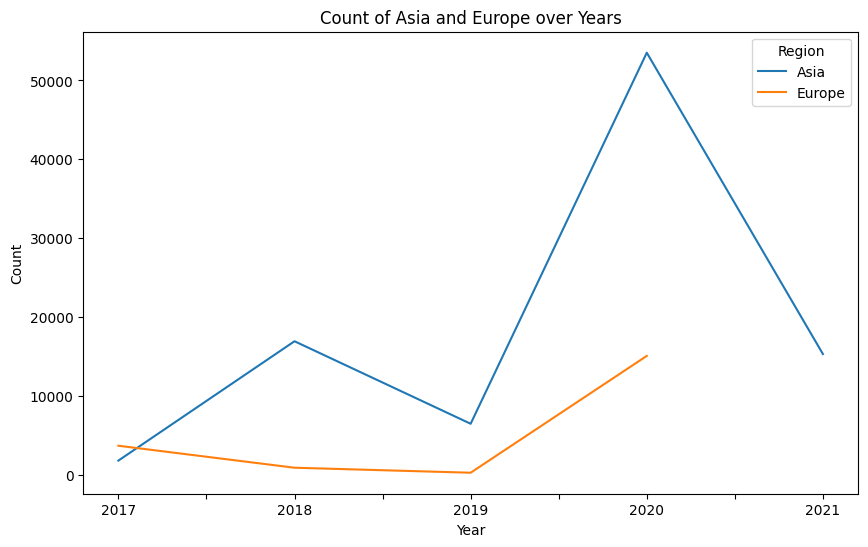

In [27]:
# Visualization

df_unstacked.plot(kind = 'line', figsize = (10,6))
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of Asia and Europe over Years')
plt.show

# Step eight:

Pull the data from column Year and Rate, and create a function for visualization using Matplotlib bar chart

In [28]:
df

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6.7,2474,2018
1,Albania,Europe,Southern Europe,2.1,61,2020
2,Algeria,Africa,Northern Africa,1.3,580,2020
3,Andorra,Europe,Southern Europe,2.6,2,2020
4,Angola,Africa,Middle Africa,4.8,1217,2012
...,...,...,...,...,...,...
190,Venezuela,Americas,South America,36.7,10598,2018
191,Vietnam,Asia,South-Eastern Asia,1.5,1358,2011
192,Yemen,Asia,Western Asia,6.8,1703,2013
193,Zambia,Africa,Eastern Africa,5.4,853,2015


## Create a new dataframe based on the Year column and SUM the Rate values

In [29]:
df5 = df.groupby(['Year'])['Rate'].sum().sort_values(ascending = False)
df5

Year
2020    608.0
2019    161.0
2012    119.5
2016     78.8
2018     70.0
2015     58.5
2014     54.2
2009     39.5
2017     30.3
2021     28.4
2013     21.7
2007     19.0
2010     18.2
2006     12.5
2011     10.1
2008      5.1
Name: Rate, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

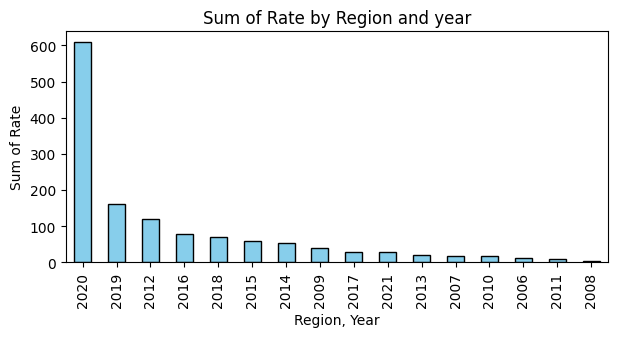

In [31]:
df5.plot(kind = 'bar', figsize = (7,3), color = 'skyblue', edgecolor = 'black')
plt.xlabel('Region, Year')
plt.ylabel('Sum of Rate')
plt.title('Sum of Rate by Region and year')
plt.show

# Step nine:

Pull the data from column Year, Region and Count, sum the value of Count column and create a function for visualization using Matplotlib bar chart

In [33]:
df

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6.7,2474,2018
1,Albania,Europe,Southern Europe,2.1,61,2020
2,Algeria,Africa,Northern Africa,1.3,580,2020
3,Andorra,Europe,Southern Europe,2.6,2,2020
4,Angola,Africa,Middle Africa,4.8,1217,2012
...,...,...,...,...,...,...
190,Venezuela,Americas,South America,36.7,10598,2018
191,Vietnam,Asia,South-Eastern Asia,1.5,1358,2011
192,Yemen,Asia,Western Asia,6.8,1703,2013
193,Zambia,Africa,Eastern Africa,5.4,853,2015


## New function df6

In [38]:
df6 = df[['Year', 'Region', 'Count']]
df6 = df6.groupby(['Year', 'Region']).sum().sort_values(by = 'Year', ascending = False).head(40)
df6

Count
Year Region          
2021 Asia       15299
2020 Oceania      221
     Europe     15066
     Asia       53516
     Americas  134784
     Africa     28460
2019 Asia        6458
     Africa     44210
     Americas    4276
     Europe       249
     Oceania      126
2018 Europe       883
     Asia       16923
     Americas   13793
2017 Europe      3670
     Asia        1787
     Africa      1467
2016 Americas     608
     Europe         0
     Asia         627
     Africa      4987
2015 Asia         241
     Africa      2206
     Europe         0
2014 Asia        3029
     Americas      13
2013 Asia        5782
2012 Africa     15264
     Asia          61
     Americas      53
2011 Asia        1626
     Africa       855
     Europe         0
2010 Europe         1
     Africa       303
2009 Americas      42
     Africa        27
2008 Africa      1702
2007 Americas      26
2006 Asia         203

## Visualizing the new function

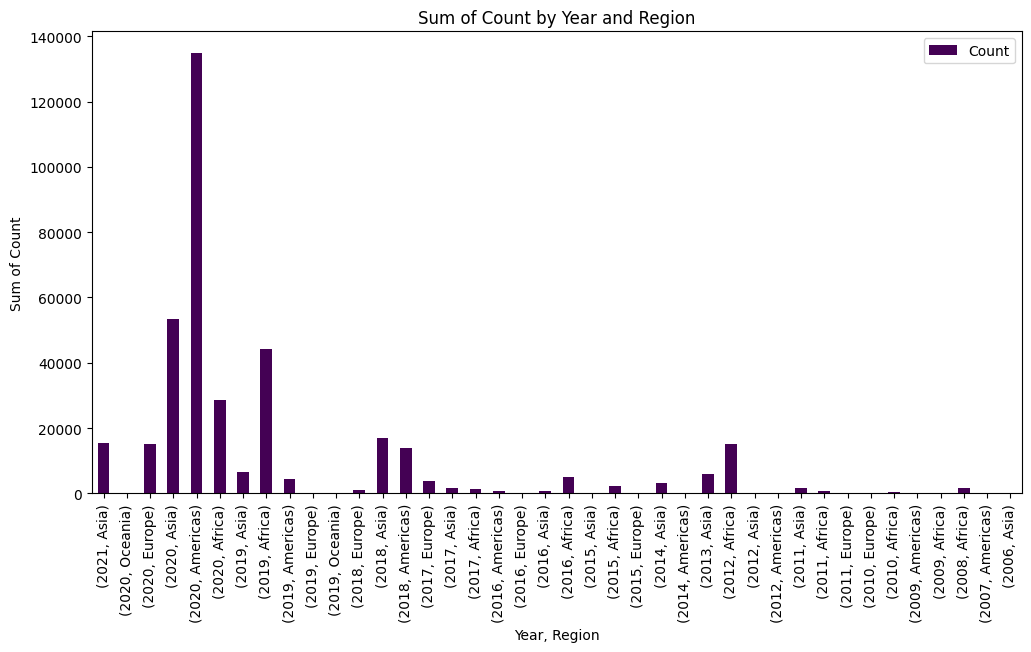

In [43]:
df6.plot(kind = 'bar', figsize = (12,6), colormap = 'viridis')
plt.xlabel('Year, Region')
plt.ylabel('Sum of Count')
plt.title('Sum of Count by Year and Region')
plt.show()